# TODO

# Experiment 1 [exp01] - compare 3 materials across 3 start methods
- target shape diameter = 4 inch,
  roll end point method = target,
  shrink = disabled
- named Experiment 1 and 2 in the demo video

In [1]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp01'

materials = [
    'play-doh',
    'plasticine',
    'kinetic-sand'
]

start_methods = [
    'centroid-2d',
    'centroid-3d',
    'highest-point'
]

data = { material: dict() for material in materials }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    if params['start_method'] not in data[params['material']]:
        data[params['material']][params['start_method']] = []

    data[params['material']][params['start_method']].append(df)


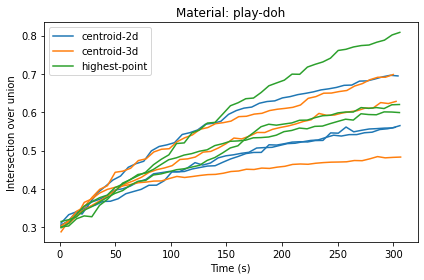

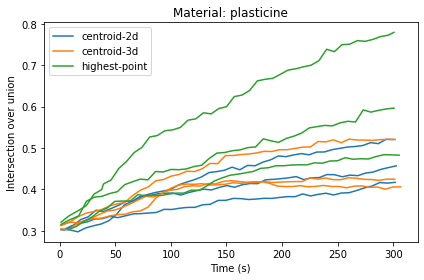

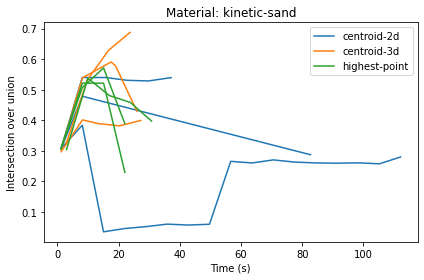

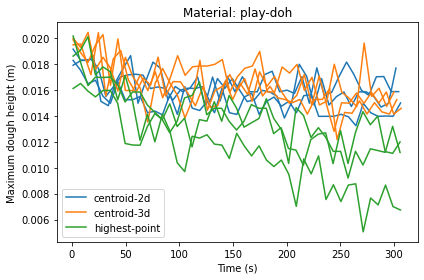

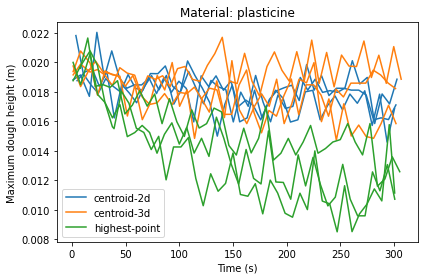

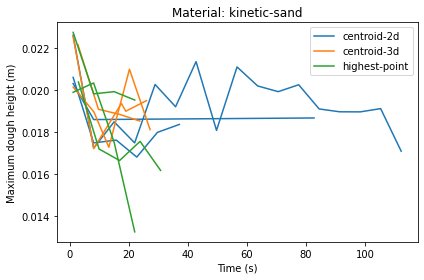

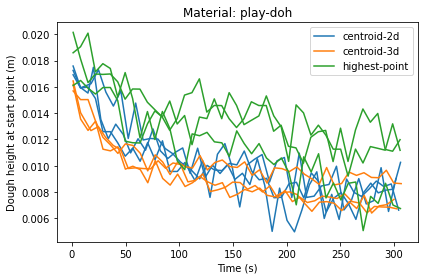

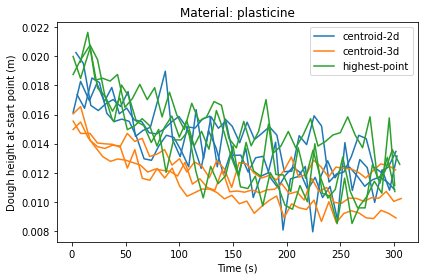

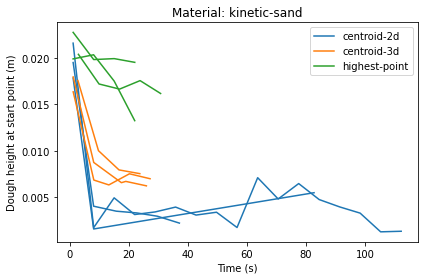

In [84]:
# Compare methods by material

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    for material in materials:
        plt.figure()#figsize=(20,10))
        for start_method, color in zip(start_methods, colors):
            for i, df in enumerate(data[material][start_method]):
                label = start_method if i == 0 else None
                plt.plot(df['Time (s)'], df[metric], color=color, label=label)
        # plt.xlim(0, 55)
        # plt.ylim(0, ymax)
        plt.xlabel('Time (s)')
        plt.ylabel(metric_label)
        plt.title(f'Material: {material}')
        plt.legend()
        # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
        plt.tight_layout()
        plt.show()


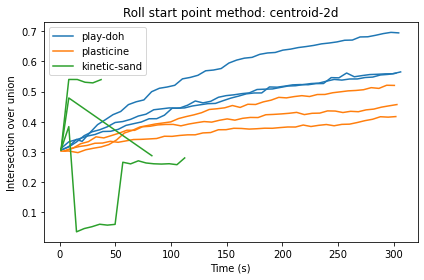

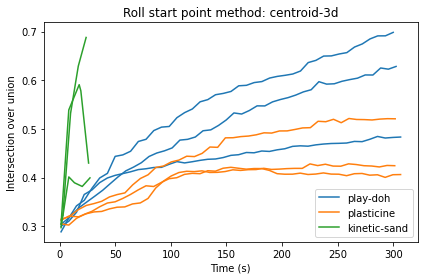

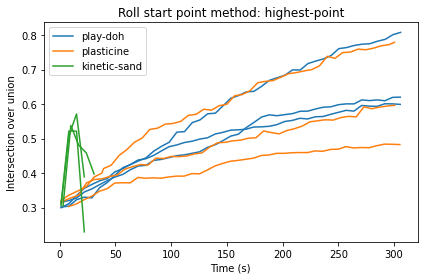

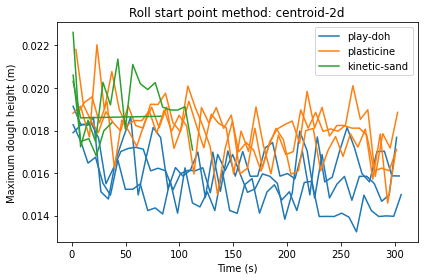

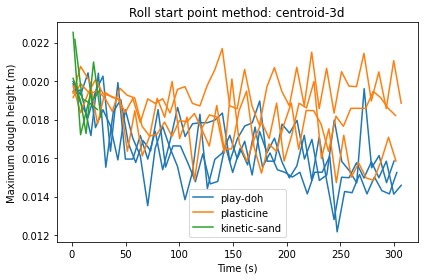

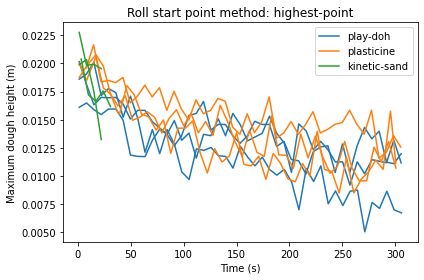

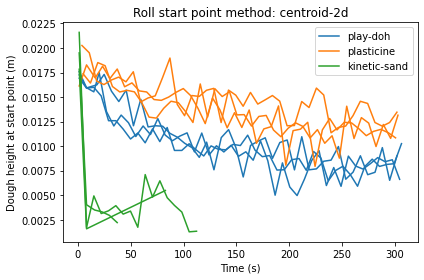

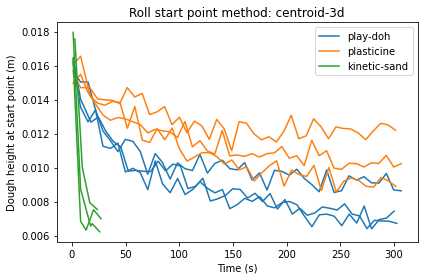

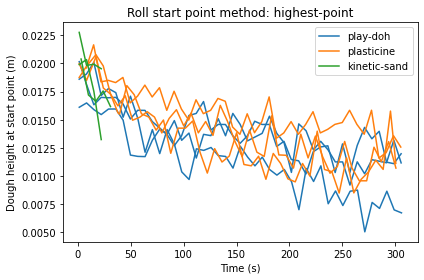

In [85]:
# Compare materials by methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
        
    for start_method in start_methods:
        plt.figure()#figsize=(20,10))
        for material, color in zip(materials, colors):
            for i, df in enumerate(data[material][start_method]):
                label = material if i == 0 else None
                plt.plot(df['Time (s)'], df[metric], color=color, label=label)
        # plt.xlim(0, 55)
        # plt.ylim(0, ymax)
        plt.xlabel('Time (s)')
        plt.ylabel(metric_label)
        plt.title(f'Roll start point method: {start_method}')
        plt.legend()
        # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
        plt.tight_layout()
        plt.show()

In [ ]:
# TODO: table with averaged end IOU


# Experiment 2 [exp02] - compare 2 roll end point methods
- target shape = 4.5 inch (largest => to see difference), 
  material = play-doh, 
  roll start point method = highest-point, 
  shrink = disabled

In [87]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp02'

end_methods = [
    'target',
    'current'
]

data = { end_method: [] for end_method in end_methods }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    data[params['end_method']].append(df)


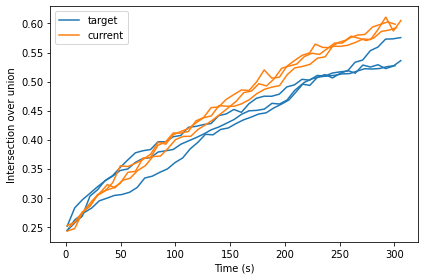

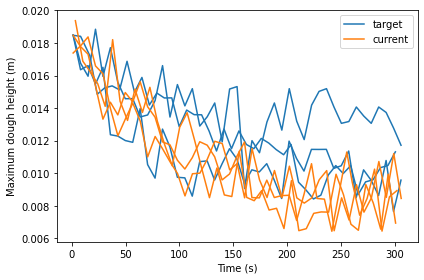

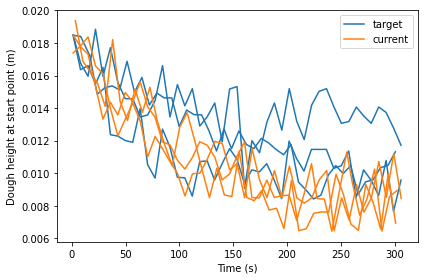

In [90]:
# Compare end methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:2]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    plt.figure()#figsize=(20,10))
    for end_method, color in zip(end_methods, colors):
        for i, df in enumerate(data[end_method]):
            label = end_method if i == 0 else None
            plt.plot(df['Time (s)'], df[metric], color=color, label=label)
    # plt.xlim(0, 55)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()


# Experiment 3 [exp03] - compare with shrink action enabled (2 variants) vs. disabled
- target shape = 3.5 inch (smallest => easiest to overshoot the target shape),
  material = play-doh, 
  roll start point method = highest-point,
  roll end point method = target

In [92]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp03'

shrink_methods = [
    'shrink-disabled',
    'forward-shrink-enabled',
    'side-shrink-enabled'
]

data = { shrink_method: [] for shrink_method in shrink_methods }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    if not params['enable_shrink']:
        shrink_method = 'shrink-disabled'
    elif params['side_shrink']:
        shrink_method = 'side-shrink-enabled'
    else:
        shrink_method = 'forward-shrink-enabled'

    data[shrink_method].append(df)


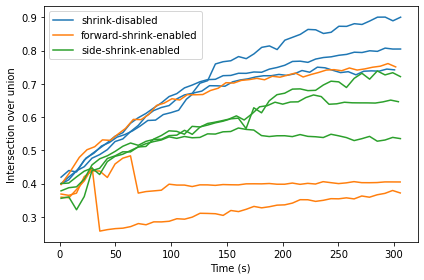

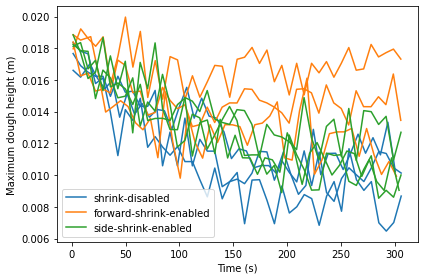

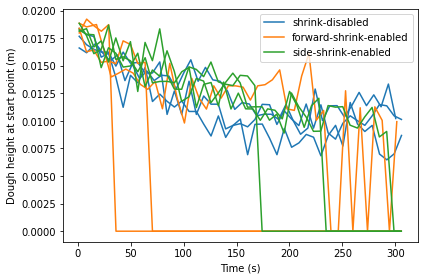

In [93]:
# Compare end methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    plt.figure()#figsize=(20,10))
    for shrink_method, color in zip(shrink_methods, colors):
        for i, df in enumerate(data[shrink_method]):
            label = shrink_method if i == 0 else None
            plt.plot(df['Time (s)'], df[metric], color=color, label=label)
    # plt.xlim(0, 55)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()


# Post-Experiment 4 [exp04] - evaluate the highest-point method across three target shape sizes
- material = play-doh, 
  roll start point method = highest-point, 
  roll end point method = target, 
  shrink = disabled

In [2]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


target_shape_size_to_exp_id = {
    'T1 (3.5 in)': 'exp03',
    'T2 (4.0 in)': 'exp01',
    'T3 (4.5 in)': 'exp02'
}

material = 'play-doh'
start_method = 'highest-point'
end_method = 'target'
shrink_enabled = False

for target_shape_size, exp_id in target_shape_size_to_exp_id.items():

    data[target_shape_size] = []
    for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
        # print(log_file)

        df = pd.read_csv(log_file)
        params = json.loads(df.iloc[0].keys()[0])
        # print(json.dumps(params, indent=2))
        df = pd.read_csv(log_file, skiprows=1, index_col=False)

        if params['material'] == material and params['start_method'] == start_method and params['end_method'] == end_method and params['enable_shrink'] == shrink_enabled:
            data[target_shape_size].append(df)


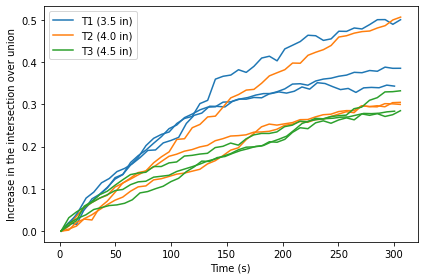

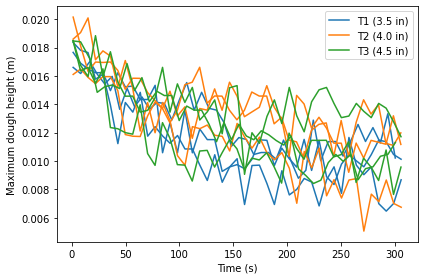

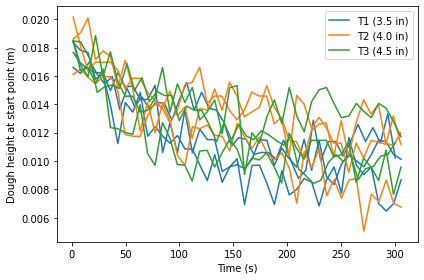

[[0.40963723 0.3703922  0.30030552]
 [0.00967352 0.0099663  0.0108667 ]
 [0.00967352 0.0099663  0.0108667 ]]


In [4]:
# Compare start methods across target shapes

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Increase in the intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

# end_values_table = []
# for metric, metric_label in metric_labels.items():
#     end_values_row = []
#     plt.figure()#figsize=(20,10))
#     for target_shape_size, color in zip(target_shape_size_to_exp_id.keys(), colors):
#         end_values = []
#         for i, df in enumerate(data[target_shape_size]):
#             label = target_shape_size if i == 0 else None
#             plt.plot(df['Time (s)'], df[metric], color=color, label=label)
#             end_values.append(df[metric].iloc[-1])
#         end_values_row.append(np.mean(end_values))
#     end_values_table.append(end_values_row)
#     # plt.xlim(0, 55)
#     # plt.ylim(0, ymax)
#     plt.xlabel('Time (s)')
#     plt.ylabel(metric_label)
#     # plt.title(f'Material: {material}')
#     plt.legend()
#     # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
#     plt.tight_layout()
#     plt.show()

# end_values_table = np.array(end_values_table)
# print(end_values_table)


# WARNING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Need to evaluate the change in IOU w.r.t. the starting IOU
end_values_table = []
for metric, metric_label in metric_labels.items():
    end_values_row = []
    plt.figure()#figsize=(20,10))
    for target_shape_size, color in zip(target_shape_size_to_exp_id.keys(), colors):
        end_values = []
        for i, df in enumerate(data[target_shape_size]):
            label = target_shape_size if i == 0 else None
            y = df[metric]
            if metric == 'IoU':
                y = y - df[metric].iloc[0]
            plt.plot(df['Time (s)'], y, color=color, label=label)
            end_values.append(y.iloc[-1])
        end_values_row.append(np.mean(end_values))
    end_values_table.append(end_values_row)
    # plt.xlim(0, 55)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()

end_values_table = np.array(end_values_table)
print(end_values_table)
